In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [219]:
data = pd.read_csv("train.csv")

In [165]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [166]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [168]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [169]:
data.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [170]:
data.isnull().mean() * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [13]:
#data.dropna(how='any',axis=0,inplace=True)
#data.shape (4650,12) # dropping almost half of the records which will not be good for the Model

### There are total 12 columns
- **11 are Independent variable**               
    Item_Identifier                    
    Item_Weight                    
    Item_Fat_Content                    
    Item_Visibility                  
    Item_Type                      
    Item_MRP                      
    Outlet_Identifier                    
    Outlet_Establishment_Year                
    Outlet_Size                             
    Outlet_Location_Type                    
    Outlet_Type    
    
    

- **1 target variable (numerical feature)**               
    Item_Outlet_Sales                  

## **Independent Variable**

**Numerical features**                   
Item_Weight ;                                                                                              	
Item_Visibility                         
Item_MRP                      
Outlet_Establishment_Year                          

**Categorical features**                  
Item_Identifier              
Item_Fat_Content               
Item_Type                    
Outlet_Identifier                 
Outlet_Size                  
Outlet_Location_Type                 
Outlet_Type                      





## UNIVARIATE

### Numerical






In [209]:
#data['Item_Visibility'] = np.log(data['Item_Visibility'])
data[data['Item_Visibility']== 0]['Item_Visibility'] = data['Item_Visibility'].mean()

C:\Users\aarti\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [221]:
tdata = scipy.stats.boxcox(data['Item_Visibility'])[0]
plt.figure(figsize = (8, 8))
sns.distplot(tdata)
plt.show()

ValueError: Data must be positive.

In [208]:
data.loc[:,['Item_Visibility']] == 0

,Item_Visibility
0,False
1,False
2,False
3,True
4,True
...,...
8518,False
8519,False
8520,False
8521,False


In [194]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox')

data['Item_Visibility_1'] = scaler.fit_transform(data[['Item_Visibility']].reshape(-1, 1))
#data['Item_Visibility_1'].hist()

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [186]:
data[data['Item_Visibility']== 0]['Item_Visibility'] 

3       0.0
4       0.0
5       0.0
10      0.0
32      0.0
       ... 
8480    0.0
8484    0.0
8486    0.0
8494    0.0
8500    0.0
Name: Item_Visibility, Length: 526, dtype: float64

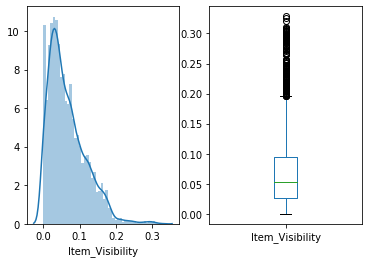

In [15]:
# remove Nan values before plotting graph otherwise it will throw error
plt.figure(1)
plt.subplot(121)
sns.distplot(data['Item_Visibility'])

plt.subplot(122)

data['Item_Visibility'].plot.box()
plt.show()

### Categorical

Item_Fat_Content              
Item_Type                  
Outlet_Identifier            
Outlet_Size                 
Outlet_Location_Type              
Outlet_Type            

In [16]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
fat_content = {
    'Low Fat': 'Low Fat',
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'Regular': 'Regular',
    'reg': 'Regular',
}

In [18]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].map(fat_content)

In [19]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [21]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [22]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [23]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [24]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## BI-VARIATE

In [25]:
import statsmodels.formula.api as smf

In [26]:
ols = smf.ols(formula='Item_Outlet_Sales ~ Item_Visibility',data=data).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     143.3
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           9.04e-33
Time:                        08:40:51   Log-Likelihood:                -75452.
No. Observations:                8523   AIC:                         1.509e+05
Df Residuals:                    8521   BIC:                         1.509e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2462.6155     29.803     82.631      0.000    2404.195    2521.036
Item_Visibility -4254.0139    355.310    -11.973      0.000   -4950.507   -3557.521
==============================================================================
Omnibus:                     1625.343   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2993.949
Skew:                           1.193   Prob(JB):                         0.00
Kurtosis:                       4.654   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
ols2 = smf.ols(formula='Item_Outlet_Sales ~ Item_MRP',data=data).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     4049.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:40:52   Log-Likelihood:                -73866.
No. Observations:                8523   AIC:                         1.477e+05
Df Residuals:                    8521   BIC:                         1.478e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5751     37.671     -0.307      0.759     -85.420      62.270
Item_MRP      15.5530      0.244     63.635      0.000      15.074      16.032
==============================================================================
Omnibus:                      751.910   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1620.941
Skew:                           0.566   Prob(JB):                         0.00
Kurtosis:                       4.812   Cond. No.                         382.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
ols2 = smf.ols(formula='Item_Outlet_Sales ~ Outlet_Establishment_Year',data=data).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     20.62
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           5.67e-06
Time:                        08:40:53   Log-Likelihood:                -75513.
No. Observations:                8523   AIC:                         1.510e+05
Df Residuals:                    8521   BIC:                         1.510e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  2.219e+04   4406.380      5.036      0.000    1.36e+04    3.08e+04
Outlet_Establishment_Year   -10.0157      2.206     -4.541      0.000     -14.339      -5.692
==============================================================================
Omnibus:                     1502.025   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2634.450
Skew:                           1.136   Prob(JB):                         0.00
Kurtosis:                       4.503   Cond. No.                     4.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## ANOVA TEST

**1) Item_Fat_Content and Item_Outlet_Sales**                  

**NULL hypothesis**: there is no relationship b/w Item_Fat_Content and Item_Outlet_Sales          
**Alternate hypothesis**: there is relatioship b/w Item_Fat_Content and Item_Outlet_Sales    

Below ols.summary() result shows that p-value(Prob (F-statistic):	0.0840) is greater than 0.05, which means we should accept the NULL hypothesis.           

But here we should not reply on ANOVA test as the categorical column have more than 2 categories. So we will go for tukey's test.


Field : **Item_Fat_Content**             
Low Fat 5517 ,Regular 3006


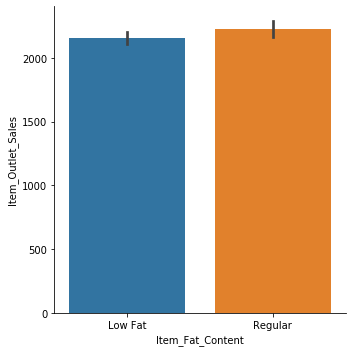

In [29]:
# METHOD 1 (VISUALIZATION)
sns.catplot(data=data,x='Item_Fat_Content',y='Item_Outlet_Sales',kind='bar')
plt.show()
# From the below image we can say that the mean of all the categories are alomst same....

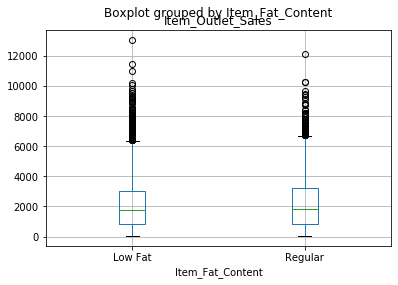

In [30]:
# METHOD 2 (VISUALIZATION)
data.boxplot('Item_Outlet_Sales',by='Item_Fat_Content')

In [31]:
# METHOD 3 (Statistical)
import statsmodels.formula.api as smf
anova1 = smf.ols(formula='Item_Outlet_Sales ~(Item_Fat_Content)',data=data).fit()
anova1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.987
Date:                Tue, 24 Nov 2020   Prob (F-statistic):             0.0840
Time:                        08:41:17   Log-Likelihood:                -75521.
No. Observations:                8523   AIC:                         1.510e+05
Df Residuals:                    8521   BIC:                         1.511e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    2157.7115     22.972     93.927      0.000    2112.680    2202.743
Item_Fat_Content[T.Regular]    66.8496     38.682      1.728      0.084      -8.976     142.675
==============================================================================
Omnibus:                     1592.405   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2897.868
Skew:                           1.177   Prob(JB):                         0.00
Kurtosis:                       4.618   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **2) Item_Type and Item_Outlet_Sales**                  

**NULL hypothesis**: there is no relationship b/w Item_Type and Item_Outlet_Sales          
**Alternate hypothesis**: there is relatioship b/w Item_Type and Item_Outlet_Sales    

Below ols.summary() result shows that p-value(Prob (F-statistic):	0.0840) is greater than 0.05, which means we should accept the NULL hypothesis.           

But here we should not reply on ANOVA test as the categorical column have more than 2 categories. So we will go for tukey's test.


Field : **Item_Type**             
Fruits and Vegetables----1232                         
Snack Foods--------------1200                     
Household-----------------910                        
Frozen Foods--------------856                          
Dairy---------------------682                       
Canned--------------------649                     
Baking Goods--------------648                       
Health and Hygiene--------520                      
Soft Drinks---------------445                            
Meat----------------------425                            
Breads--------------------251                            
Hard Drinks---------------214                              
Others--------------------169                           
Starchy Foods-------------148                        
Breakfast-----------------110                   
Seafood--------------------64                  

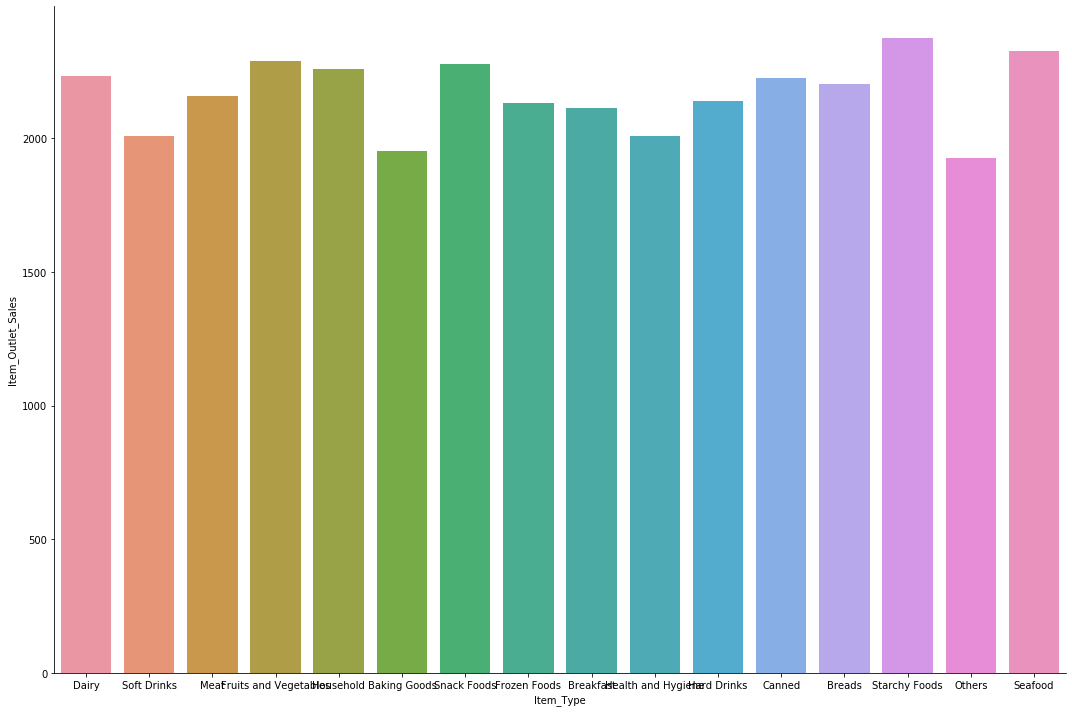

In [88]:
# METHOD - 1
sns.catplot(data=data,x='Item_Type' , y ='Item_Outlet_Sales',kind='bar',ci=None,height=10, aspect=1.5)


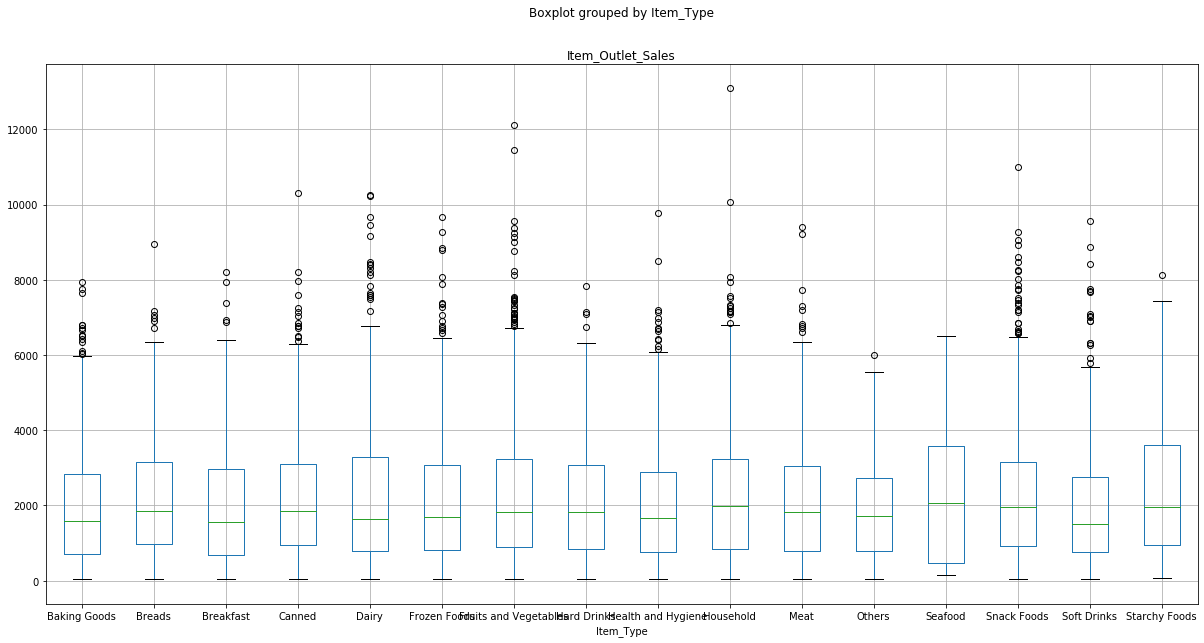

In [42]:
# METHOD - 2 
data.boxplot('Item_Outlet_Sales',by='Item_Type',figsize=(20,10))

In [44]:
import statsmodels

In [67]:
mc = statsmodels.stats.multicomp.MultiComparison(data['Item_Outlet_Sales'],data['Item_Type'])
mc_results = mc.tukeyhsd()
print(mc_results)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
        group1                group2         meandiff p-adj    lower      upper   reject
----------------------------------------------------------------------------------------
         Baking Goods                Breads   251.161 0.8108  -183.0066  685.3286  False
         Baking Goods             Breakfast  158.8374    0.9  -443.3791   761.054  False
         Baking Goods                Canned  272.2237 0.2272   -52.0876   596.535  False
         Baking Goods                 Dairy  279.5714 0.1733   -40.7958  599.9386  False
         Baking Goods          Frozen Foods  179.8965 0.7817   -124.193  483.9861  False
         Baking Goods Fruits and Vegetables  336.0384  0.005    52.6461  619.4307   True
         Baking Goods           Hard Drinks  186.2504    0.9   -274.177  646.6778  False
         Baking Goods    Health and Hygiene   57.0291    0.9  -286.7934  400.8515  False
         Baking Goods

group1,group2,meandiff,p-adj,lower,upper,reject
Baking Goods,Breads,251.161,0.8108,-183.0066,685.3286,False
Baking Goods,Breakfast,158.8374,0.9,-443.3791,761.054,False
Baking Goods,Canned,272.2237,0.2272,-52.0876,596.535,False
Baking Goods,Dairy,279.5714,0.1733,-40.7958,599.9386,False
Baking Goods,Frozen Foods,179.8965,0.7817,-124.193,483.9861,False
Baking Goods,Fruits and Vegetables,336.0384,0.005,52.6461,619.4307,True
Baking Goods,Hard Drinks,186.2504,0.9,-274.177,646.6778,False
Baking Goods,Health and Hygiene,57.0291,0.9,-286.7934,400.8515,False
Baking Goods,Household,305.8131,0.0407,5.6361,605.9901,True
Baking Goods,Meat,206.0067,0.8404,-158.512,570.5254,False


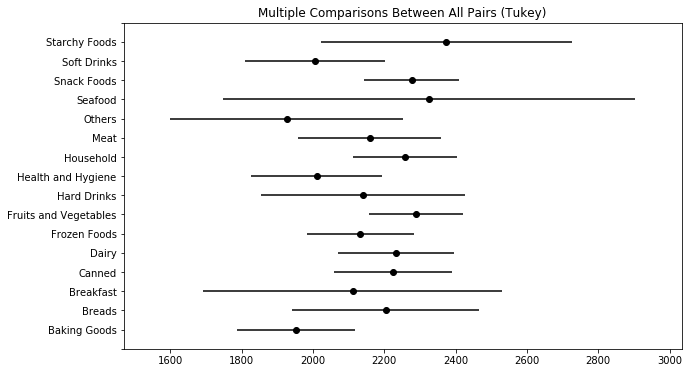

In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data['Item_Outlet_Sales'],     # Data
                          groups=data['Item_Type'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary() 

## VARIABLE #
### 3. Outlet_Identifier


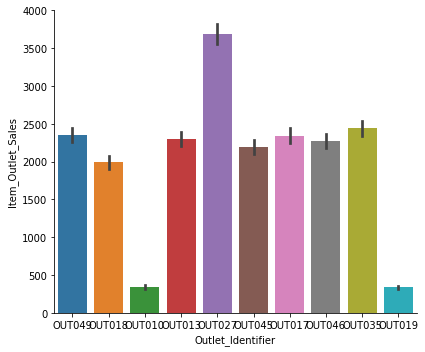

In [89]:
sns.catplot(data=data,x='Outlet_Identifier',y='Item_Outlet_Sales',kind='bar',height=5,aspect=1.2)

In [71]:
mc = statsmodels.stats.multicomp.MultiComparison(data['Item_Outlet_Sales'],data['Outlet_Identifier'])
mc_results = mc.tukeyhsd()
print(mc_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
OUT010 OUT013  1959.6436  0.001  1707.2275  2212.0596   True
OUT010 OUT017  2001.3236  0.001  1748.6025  2254.0447   True
OUT010 OUT018  1656.1471  0.001  1403.5281  1908.7661   True
OUT010 OUT019     0.9781    0.9    -285.22   287.1761  False
OUT010 OUT027  3354.6869  0.001   3102.422  3606.9518   True
OUT010 OUT035  2099.4902  0.001  1846.9729  2352.0075   True
OUT010 OUT045  1853.0331  0.001   1600.465  2105.6013   True
OUT010 OUT046  1938.4926  0.001  1685.9753  2191.0099   True
OUT010 OUT049   2009.003  0.001  1756.4856  2261.5203   True
OUT013 OUT017      41.68    0.9  -176.7566   260.1166  False
OUT013 OUT018  -303.4965  0.001   -521.815   -85.1781   True
OUT013 OUT019 -1958.6655  0.001 -2215.0947 -1702.2363   True
OUT013 OUT027  1395.0433  0.001  1177.1347  1612.9519   True
OUT013 OUT035   139.8466

## 4. Outlet_Location_Type

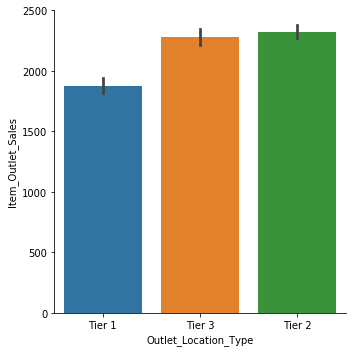

In [90]:
sns.catplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',kind='bar',data=data)

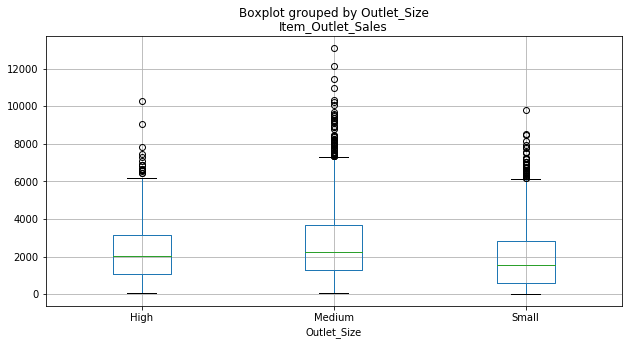

In [94]:
data.boxplot('Item_Outlet_Sales',by='Outlet_Size',figsize=(10,5))

In [138]:
mc = statsmodels.stats.multicomp.MultiComparison(data['Item_Outlet_Sales'],data['Outlet_Location_Type'])
mc_results = mc.tukeyhsd()
print(mc_results)

## Remove Nan values first otherwise it will throw error

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
Tier 1 Tier 2 447.0814 0.001  336.2033 557.9595   True
Tier 1 Tier 3 402.7185 0.001  296.2441 509.1928   True
Tier 2 Tier 3 -44.3629  0.56 -146.3104  57.5846  False
------------------------------------------------------


In [95]:
mc = statsmodels.stats.multicomp.MultiComparison(data['Item_Outlet_Sales'],data['Outlet_Size'])
mc_results = mc.tukeyhsd()
print(mc_results)

## Remove Nan values first otherwise it will throw error

TypeError: '<' not supported between instances of 'str' and 'float'

## 6. Outlet_Type

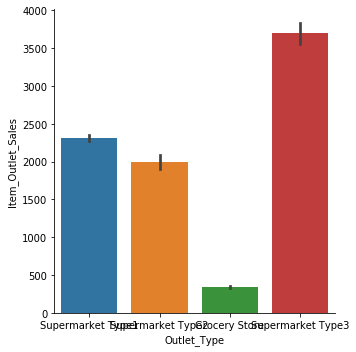

In [98]:
sns.catplot(x='Outlet_Type',y='Item_Outlet_Sales',kind='bar',data=data)

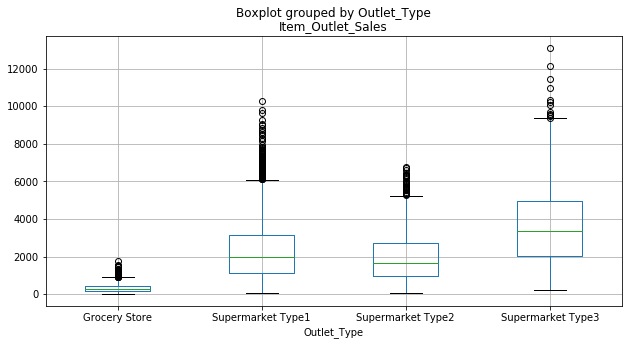

In [100]:
data.boxplot('Item_Outlet_Sales',by='Outlet_Type',figsize=(10,5))

In [101]:
mc = statsmodels.stats.multicomp.MultiComparison(data['Item_Outlet_Sales'],data['Outlet_Type'])
mc_results = mc.tukeyhsd()
print(mc_results)

## Remove Nan values first otherwise it will throw error

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1            group2       meandiff p-adj   lower     upper   reject
------------------------------------------------------------------------------
    Grocery Store Supermarket Type1 1976.3526 0.001 1849.3577 2103.3476   True
    Grocery Store Supermarket Type2 1655.6702 0.001 1484.5971 1826.7434   True
    Grocery Store Supermarket Type3 3354.2101 0.001 3183.4821  3524.938   True
Supermarket Type1 Supermarket Type2 -320.6824 0.001 -456.2679 -185.0969   True
Supermarket Type1 Supermarket Type3 1377.8574 0.001 1242.7077 1513.0071   True
Supermarket Type2 Supermarket Type3 1698.5398 0.001 1521.3288 1875.7508   True
------------------------------------------------------------------------------


In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
LE = LabelEncoder()

In [104]:
LE.fit(data['Outlet_Type'])

LabelEncoder()

In [105]:
data['Outlet_Type'].values

array(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type1', ...,
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type1'],
      dtype=object)

In [106]:
data['Outlet_Type'] = LE.transform(data['Outlet_Type'])

In [107]:
data['Outlet_Type'].values

array([1, 2, 1, ..., 1, 2, 1])

In [139]:
data1= pd.get_dummies(data,columns=['Item_Type','Item_Fat_Content','Outlet_Identifier','Outlet_Location_Type'],drop_first=True)

In [141]:
# df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
#                     'C': ['a', 'd', 'e']})

# pd.get_dummies(df)
# #    C  col1_a  col1_b  col2_a  col2_b  col2_c
# # 0  1       1       0       0       1       0
# # 1  2       0       1       1       0       0
# # 2  3       1       0       0       0       1

In [142]:
#len(data.columns)

In [143]:
#len(data.Item_Type.value_counts())

In [144]:
#len(data1.columns)

In [145]:
#data1.head()

In [146]:
data1.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.30,0.016047,249.8092,1999,Medium,1,3735.1380,0,0,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,2009,Medium,2,443.4228,0,0,...,0,1,0,0,0,0,0,0,0,1
2,FDN15,17.50,0.016760,141.6180,1999,Medium,1,2097.2700,0,0,...,0,0,0,0,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,1998,NaN,0,732.3800,0,0,...,0,0,0,0,0,0,0,0,0,1
4,NCD19,8.93,0.000000,53.8614,1987,High,1,994.7052,0,0,...,0,0,0,0,0,0,0,0,0,1


In [147]:
X = data1.drop(['Item_Outlet_Sales','Item_Weight','Outlet_Size','Item_Identifier'],axis=1)
Y = data1['Item_Outlet_Sales']

In [148]:
X.isnull().any()

Item_Visibility                    False
Item_MRP                           False
Outlet_Establishment_Year          False
Outlet_Type                        False
Item_Type_Breads                   False
Item_Type_Breakfast                False
Item_Type_Canned                   False
Item_Type_Dairy                    False
Item_Type_Frozen Foods             False
Item_Type_Fruits and Vegetables    False
Item_Type_Hard Drinks              False
Item_Type_Health and Hygiene       False
Item_Type_Household                False
Item_Type_Meat                     False
Item_Type_Others                   False
Item_Type_Seafood                  False
Item_Type_Snack Foods              False
Item_Type_Soft Drinks              False
Item_Type_Starchy Foods            False
Item_Fat_Content_Regular           False
Outlet_Identifier_OUT013           False
Outlet_Identifier_OUT017           False
Outlet_Identifier_OUT018           False
Outlet_Identifier_OUT019           False
Outlet_Identifie

In [149]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.3)

In [150]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(5966, 31) (2557, 31)
(5966,) (2557,)


In [151]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
y_pred = lr.predict(x_test)

In [154]:
from sklearn.metrics import r2_score

In [157]:
r2_score(y_pred,y_test)

0.23815491696973023